The goal of this homework is to create a regression model for prediction apartment prices (column 'price').

EDA
Load the data.
Look at the price variable. Does it have a long tail?

Features
For the rest of the homework, you'll need to use only these columns:

'latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365'
Select only them.

In [5]:
import pandas as pd
import numpy as np

In [6]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'

In [7]:
df = pd.read_csv(data)

In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
columns = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

In [10]:
df = df[columns]

In [11]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


<AxesSubplot:>

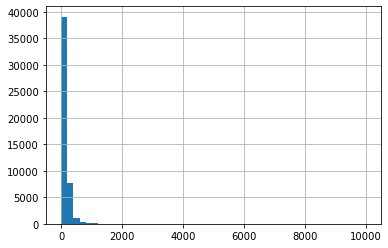

In [12]:
df.price.hist(bins = 50)

# Question 1
Find a feature with missing values. How many missing values does it have?

In [13]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Question 2
What's the median (50% percentile) for variable 'minimum_nights'?

In [14]:
df.minimum_nights.median()

3.0

In [15]:
#EDA 

for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

latitude
[40.64749 40.75362 40.80902 40.68514 40.79851]
19048

longitude
[-73.97237 -73.98377 -73.9419  -73.95976 -73.94399]
14718

price
[149 225 150  89  80]
674

minimum_nights
[ 1  3 10 45  2]
109

number_of_reviews
[  9  45   0 270  74]
394

reviews_per_month
[0.21 0.38  nan 4.64 0.1 ]
937

calculated_host_listings_count
[6 2 1 4 3]
47

availability_365
[365 355 194   0 129]
366



Split the data
Shuffle the initial dataset, use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Make sure that the target value ('price') is not in your dataframe.
Apply the log transformation to the price variable using the np.log1p() function.

In [16]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [17]:
n, n_val, n_test, n_train

(48895, 9779, 9779, 29337)

In [18]:
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [19]:
idx = np.arange(n)

In [20]:
np.random.seed(42)
np.random.shuffle(idx)

In [21]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [22]:
df_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


In [23]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [24]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [25]:
del df_train['price']
del df_val['price']
del df_test['price']

In [26]:
len(y_train)

29337

# Question 3
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lesssons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

In [27]:
y_mean = y_train.mean()
y_mean

4.73357719812657

In [28]:
columns = ['latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [29]:
X_train_0 = df_train[columns].fillna(0).values

In [46]:
X_train_mean = df_train[columns].fillna(y_mean).values

In [31]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [32]:
# 0 training

w0, w = train_linear_regression(X_train_0, y_train)
y_pred_0 = w0 + X_train_0.dot(w)

In [33]:
w0, w

(-419.9126602782961,
 array([ 1.30676226e+00, -5.02167857e+00, -5.59803112e-04, -4.07634897e-04,
        -8.25470057e-03,  1.33371319e-03,  6.50203891e-04]))

In [1]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [44]:
rmse(y_train, y_pred_0).round(2)

0.64

In [39]:
# Mean training

w0, w = train_linear_regression(X_train_mean, y_train)

y_pred_mean = w0 + X_train_mean.dot(w)


In [40]:
w0, w

(-425.60593441419024,
 array([ 1.30713861e+00, -5.09802793e+00, -5.25871309e-04, -7.21065067e-04,
         1.57452442e-02,  1.25466849e-03,  6.32787740e-04]))

In [45]:
rmse(y_train, y_pred_mean).round(2)

0.64

# With the Validation data

In [55]:
def prepare_X_0(df):
    df_num = df[columns]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [49]:
def prepare_X_mean(df):
    df_num = df[columns]
    df_num = df_num.fillna(y_mean)
    X = df_num.values
    return X

In [50]:
# 0

X_val = prepare_X_0(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.6432910214229959

In [51]:
# mean

X_val = prepare_X_mean(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.6418502387160557

# Question 4
Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If there are multiple options, select the smallest r.

In [69]:
def train_linear_regression_reg(X, y, r=0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [70]:
X_train = prepare_X_0(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w0 + X_train.dot(w)
rmse(y_train, y_pred)

0.6543837498318069

In [71]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X_0(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X_0(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred).round(2)
    
    print(r, w0, score)

0.0 -419.9126602782961 0.64
1e-05 -419.4137655582609 0.64
0.0001 -414.97649420185604 0.64
0.001 -375.2736539367924 0.64
0.1 -32.56256056402253 0.68
1 -3.4992168400821244 0.68
10 -0.35127675971367145 0.68


0 is the best r

# Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [224]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [225]:
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [226]:
idx = np.arange(n)

In [227]:
np.random.seed(9)
np.random.shuffle(idx)

In [228]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [229]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [230]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [231]:
del df_train['price']
del df_val['price']
del df_test['price']

In [232]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [233]:
def prepare_X_0(df):
    df_num = df[columns]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [234]:
X_train = prepare_X_0(df_train)
X_val = prepare_X_0(df_val)

In [235]:
#training

w0, w = train_linear_regression(X_train, y_train)


In [236]:
# Prediction

y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.643756516828629

In [238]:
RMSEs = [0.6549779961346657, 0.6462523685627168, 0.6476558176286166, 0.6375145070186145, 0.6445809083682932,
         0.6305809996187742, 0.6297851917850126, 0.6506184267094883, 0.6489780353545126, 0.643756516828629]

In [240]:
RMSEs = np.array(RMSEs)

In [241]:
np.std(RMSEs).round(3)

0.008

# Question 6
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Train a model with r=0.001.
What's the RMSE on the test dataset?

In [242]:
df_full_train = pd.concat([df_train, df_val])

In [243]:
df_full_train = df_full_train.reset_index(drop=True)

In [244]:
X_full_train = prepare_X_0(df_full_train)

In [245]:
X_full_train

array([[ 4.070423e+01, -7.391595e+01,  1.000000e+00, ...,  1.300000e-01,
         1.000000e+00,  0.000000e+00],
       [ 4.077115e+01, -7.392275e+01,  4.000000e+01, ...,  2.700000e-01,
         1.000000e+00,  2.070000e+02],
       [ 4.070401e+01, -7.400932e+01,  2.900000e+01, ...,  0.000000e+00,
         9.600000e+01,  1.000000e+00],
       ...,
       [ 4.072982e+01, -7.398593e+01,  2.000000e+00, ...,  1.100000e-01,
         1.000000e+00,  0.000000e+00],
       [ 4.071969e+01, -7.395620e+01,  1.000000e+00, ...,  2.000000e-02,
         1.000000e+00,  0.000000e+00],
       [ 4.066949e+01, -7.392172e+01,  1.000000e+00, ...,  1.910000e+00,
         2.000000e+00,  3.230000e+02]])

In [246]:
y_full_train = np.concatenate([y_train, y_val])

In [247]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [249]:
X_test = prepare_X_0(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score.round(2)

0.65

Submit the results
Submit your results here: https://forms.gle/2N9GkTr1AgNeZ8hD7.

If your answer doesn't match options exactly, select the closest one.